In [24]:
#libraries
import numpy as np 
import pandas as pd 
import os
import json
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from PIL import Image
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
# from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
import random
import warnings
warnings.filterwarnings("ignore")
from functools import partial
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)
import os
import scipy as sp
from math import sqrt
from collections import Counter
from sklearn.metrics import confusion_matrix as sk_cmatrix

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.ensemble import RandomForestClassifier
# import langdetect
import eli5
from IPython.display import display 

from sklearn.metrics import cohen_kappa_score
def kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')


In [25]:
bread_labels = pd.read_csv('../pet_data/breed_labels.csv')
color_labels = pd.read_csv('../pet_data/color_labels.csv')
state_labels = pd.read_csv('../pet_data/state_labels.csv')
test_sample_submission = pd.read_csv('../pet_data/test/sample_submission.csv')
test = pd.read_csv('../pet_data/test/test.csv')
train = pd.read_csv('../pet_data/train.csv')
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])

In [71]:
pet_id_adopt_rate = pd.DataFrame([train.PetID, train.AdoptionSpeed]).transpose()

In [79]:
pet_id_adopt_rate.sort_values(by=['PetID'], ascending=True)

,PetID,AdoptionSpeed
3057,0008c5398,3
4839,000a290e4,2
14218,000fb9572,3
7933,0011d7c25,2
3722,00156db4a,1
9848,001a1aaad,2
11520,001b1507c,1
4762,002230dea,1
6760,002278114,1
3230,0025a8313,4


In [73]:
pet_id_adopt_rate.PetID.value_counts()

e4406b18a    1
38d23c02f    1
6ca8be82b    1
cf85bd080    1
d08bc2c0a    1
adff46aad    1
6138cd70d    1
b386bb45c    1
cff3127ad    1
628e30f3b    1
cbd6b3064    1
8df39788a    1
48432dfa0    1
ec83e77f0    1
7dd780fe8    1
9c5feed55    1
db0a53c3a    1
71edb3344    1
0db65104a    1
2bf2c6260    1
f0f9efd52    1
b8e6cb9b1    1
1dc007dfa    1
da8d56dff    1
5301da118    1
cedeef1a7    1
50fe7d515    1
c702e00d2    1
8f519310b    1
0b3deeb66    1
10e1cbfdd    1
65e386742    1
883e7d058    1
ef896feeb    1
990e04b81    1
2e73c3dc3    1
1da3eb996    1
8988d22a5    1
a6deb30e1    1
0ed23a049    1
f41a7de83    1
30f92e1ab    1
acf289a37    1
a72492a9d    1
470e49e41    1
672cc8af8    1
80ae0a34f    1
c38afccab    1
dd13b36c6    1
5dce619e3    1
            ..
aa0d42c80    1
e24a30aaa    1
d4e83ee5b    1
040771e8e    1
722beb3aa    1
a2317e5b0    1
9c80a9ed6    1
3a3dc1dab    1
269d8414a    1
de0f96a50    1
440ab06be    1
aa91c3400    1
2cfbdd28a    1
4d6350e54    1
506fa1d6e    1
c99e3a906 

In [26]:
os.listdir('../pet_data/')

['test_images',
 'breed_labels.csv',
 'test',
 'train_metadata',
 'color_labels.csv',
 'test_sentiment',
 'test_metadata',
 'train_sentiment',
 'train.csv',
 'train_images',
 'state_labels.csv']

In [27]:
all_data.drop(['Description'], axis=1).head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type
0,2.0,3,299,0,1,7,0,2,100,1,1,1,1,Nibble,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0,train
1,0.0,1,265,0,1,2,0,3,0,2,1,1,2,No Name Yet,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0,train
2,3.0,1,307,0,2,7,0,1,0,2,1,1,2,Brisco,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0,train
3,2.0,4,307,0,1,2,0,1,150,1,2,1,2,Miko,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0,train
4,2.0,1,307,0,1,0,0,2,0,1,1,1,2,Hunter,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,1,2,0,train


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 0 to 3947
Data columns (total 25 columns):
AdoptionSpeed    14993 non-null float64
Age              18941 non-null int64
Breed1           18941 non-null int64
Breed2           18941 non-null int64
Color1           18941 non-null int64
Color2           18941 non-null int64
Color3           18941 non-null int64
Description      18927 non-null object
Dewormed         18941 non-null int64
Fee              18941 non-null int64
FurLength        18941 non-null int64
Gender           18941 non-null int64
Health           18941 non-null int64
MaturitySize     18941 non-null int64
Name             17381 non-null object
PetID            18941 non-null object
PhotoAmt         18941 non-null float64
Quantity         18941 non-null int64
RescuerID        18941 non-null object
State            18941 non-null int64
Sterilized       18941 non-null int64
Type             18941 non-null int64
Vaccinated       18941 non-null int64
VideoAmt  

Text(0.5, 1.0, 'Adaption speed classes counts')

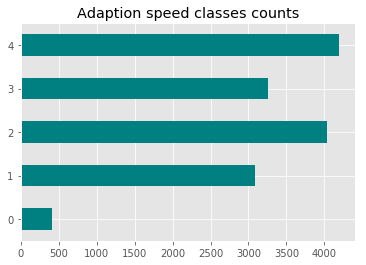

In [29]:
train.AdoptionSpeed.value_counts().sort_index().plot('barh', color='teal')
plt.title('Adaption speed classes counts')

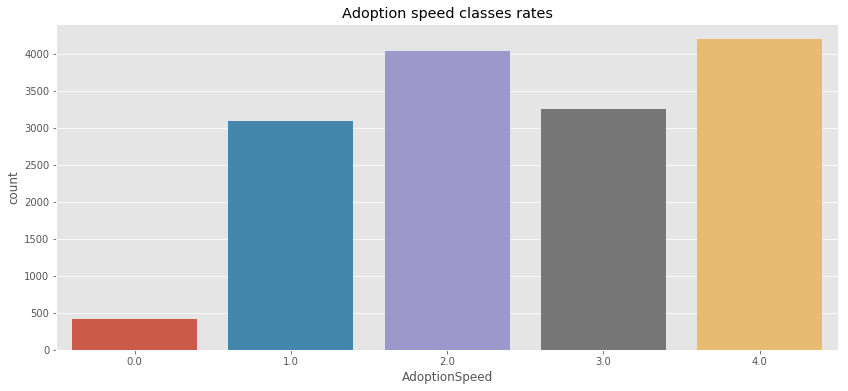

In [30]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train']);
plt.title('Adoption speed classes rates');
ax=g.axes

In [31]:
ax.patches[0].get_x()

-0.4

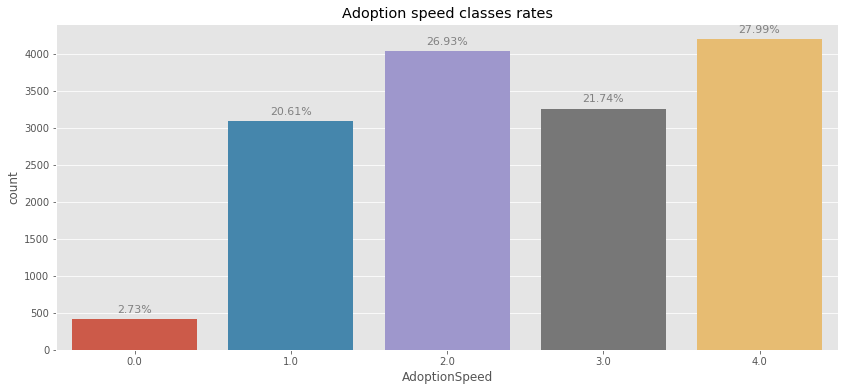

In [32]:
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=all_data.loc[all_data['dataset_type'] == 'train'])
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

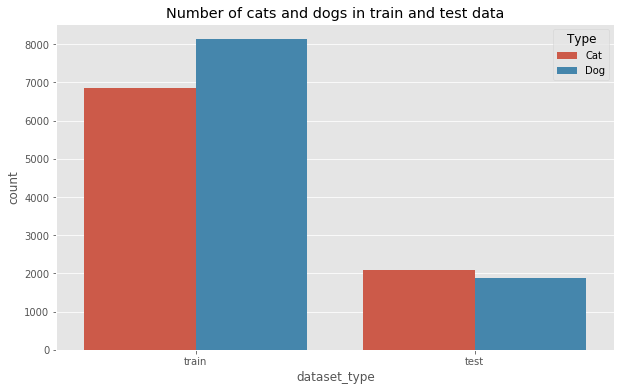

In [33]:
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Type');
plt.title('Number of cats and dogs in train and test data');

In [34]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points') 
        

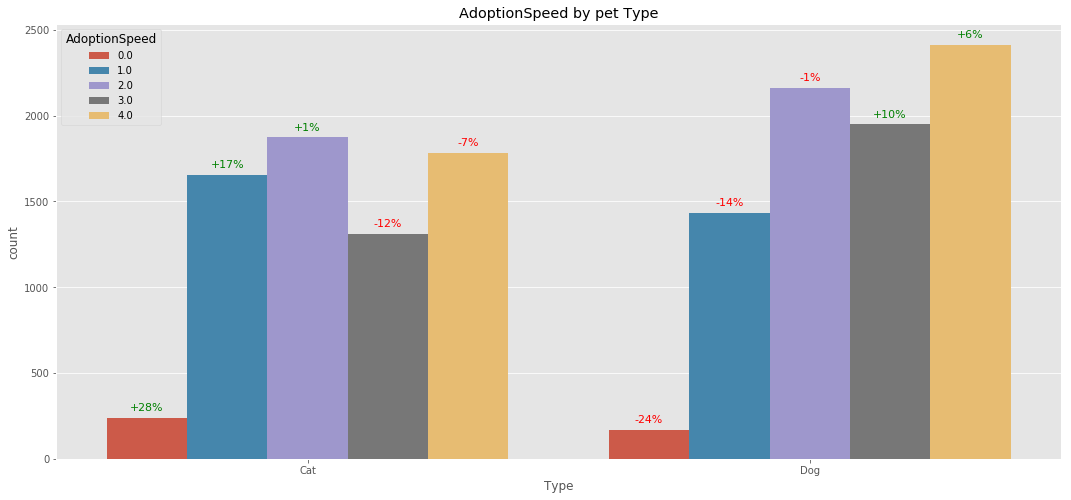

In [35]:
plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='Type', title='by pet Type')


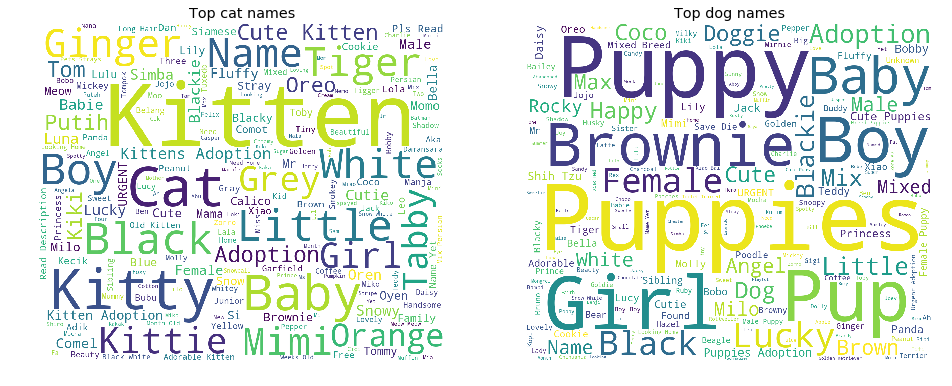

In [36]:
ig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(all_data.loc[all_data['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(all_data.loc[all_data['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [37]:
print('Most popular pet names and AdoptionSpeed')
for n in train['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name'] == n, 'AdoptionSpeed'].value_counts().sort_index())
    print('')


Most popular pet names and AdoptionSpeed
Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



In [38]:
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
all_data['Name'] = all_data['Name'].fillna('Unnamed')

train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'Unnamed', 'No_name'] = 1

print(f"Rate of unnamed pets in train data: {train['No_name'].sum() * 100 / train['No_name'].shape[0]:.4f}%.")
print(f"Rate of unnamed pets in test data: {test['No_name'].sum() * 100 / test['No_name'].shape[0]:.4f}%.")

Rate of unnamed pets in train data: 8.4173%.
Rate of unnamed pets in test data: 7.6748%.
